Introduction :

News media has become a channel to pass on the information of what’s happening in the world to the people living. Often people perceive whatever conveyed in the news to be true. There were circumstances where even the news channels acknowledged that their news is not true as they wrote. But some news has a significant impact not only on the people or government but also on the economy. One news can shift the curves up and down depending on the emotions of people and political situation.

It is important to identify the fake news from the real true news. The problem has been taken over and resolved with the help of Natural Language Processing tools which help us identify fake or true news based on historical data. The news is now in safe hands!

Problem statement :

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

The sensationalism of not-so-accurate eye-catching and intriguing headlines aimed at retaining the attention of audiences to sell information has persisted all throughout the history of all kinds of information broadcast. On social networking websites, the reach and effects of information spread are however significantly amplified and occur at such a fast pace, that distorted, inaccurate, or false information acquires a tremendous potential to cause real impacts, within minutes, for millions of users.

Objective :

Our sole objective is to classify the news from the dataset as fake or true news. Extensive EDA of news Selecting and building a powerful model for classification Import Libraries Let’s import all necessary libraries for the analysis and along with it let’s bring down our dataset

In [ ]:
from google.colab import files
upload = files.upload()

Saving Fake_News.xlsx to Fake_News.xlsx


In [ ]:
from google.colab import files
upload = files.upload()

Saving Real_News.xlsx to Real_News.xlsx


In [ ]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
# Base level imports for data science work

import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Deep Learning Libs
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [ ]:
#reading the fake and true datasets
fake = pd.read_excel("Fake_News.xlsx") 
true = pd.read_excel("Real_News.xlsx") 

In [ ]:
# Let's explore the data at a base level

true.sample(20)


,Title,text,Subject
20047,"EU wants Brexit money this month, Davis seeks ...",BRUSSELS (Reuters) - The European Union told B...,worldnews
15223,EDF wants to take part in Saudi nuclear plans:...,PARIS (Reuters) - French state-controlled util...,worldnews
1528,"Give us some clarity on Brexit, French ministe...",LONDON (Reuters) - The British government need...,worldnews
631,Judge lets Wisconsin officials decide how to p...,MILWAUKEE (Reuters) - Local officials in Wisco...,politicsNews
2372,Factbox: Xi allies dominate China's new 25-mem...,(Reuters) - While the new seven-member Politbu...,worldnews
20559,Senators press Trump for details on Icahn's sp...,(Reuters) - Six U.S. Senate Democrats on Thurs...,politicsNews
6242,Comey says Trump fired him to undermine FBI Ru...,WASHINGTON (Reuters) - Former FBI Director Jam...,politicsNews
5106,Islamic State claims Marseille knife attack th...,CAIRO (Reuters) - An Islamic State militant wa...,worldnews
17626,Biafra separatists sponsored by Nigerian gover...,ABUJA (Reuters) - A Nigerian minister accused ...,worldnews
21597,Congresswoman quits Democratic National Commit...,WASHINGTON (Reuters) - Democratic National Com...,politicsNews


In [ ]:

fake.sample(20)

,Title,text,Subject
5538,The GOP Has Made Such A Mockery Of Elections ...,Canada is just fun. Our great white neighbor t...,News
23656,Principles Over Power: Why Republicans Need T...,"Over the last few weeks, I ve watched as the l...",News
2568,This Post-Election Scene From A School Cafete...,How are nonwhite children supposed to feel saf...,News
15646,BREAKING: PAUL RYAN Nervously Giggles During B...,Paul Ryan nervously giggled during the Republi...,Government News
19110,WORKING CLASS REVOLT! OLD SCHOOL JERSEY PATRIO...,HE WILL NOT DIVIDE US .,left-news
11141,UN AMBASSADOR SAMANTHA POWER Unmasked Hundreds...,Adam Kredo of WFB asks the question we all wan...,Government News
12408,BEST BERNIE SANDERS Yard Sign You Will EVER See!,Here s a great way to explain socialism to the...,politics
3541,Megyn Kelly Unveils DAMNING Truth Bomb About ...,"Prior to the election, one of the things that ...",News
14313,Even Trumpâ€™s Own Ex-Organizer Accuses Him O...,"Just a day before the Iowa caucuses, a former ...",News
12827,WIFE OF MUSLIM Immigrant Screams: â€œF*CK AMER...,Such a nice little immigrant family. Let s bri...,left-news


In [ ]:
true.shape,fake.shape


((21755, 3), (23697, 3))

In [ ]:
# These dataframes do not currently have a category for whether they are true or fake.
# Let's create those before we combine the datasets

true['category'] = 1
fake['category'] = 0

In [ ]:

# Now we'll merge the two datasets into a single dataframe

df = pd.concat([true,fake])

In [ ]:

df.sample(10)

,Title,text,Subject,category
7148,Ethnic land dispute forces thousands to flee i...,"GUIGLO, Ivory Coast (Reuters) - An ethnic-fuel...",worldnews,1
2549,WATCH: ACTOR JAMES WOODS Shares HILARIOUS Vide...,This is a MUST WATCH and SHARE!If anyone s won...,politics,0
6113,LOL! DEMOCRAT Congressman HUMILIATED After Com...,"Democrat dummy of the day Rep. Tom Cole (R., O...",politics,0
4317,"Flynn's lawyers cut talks with Trump team, sig...",WASHINGTON (Reuters) - Lawyers for Michael Fly...,politicsNews,1
18226,"Syria army, U.S.-backed forces converge on Isl...",BEIRUT (Reuters) - Syrian government forces an...,worldnews,1
12510,UK government confident of winning vote on Bre...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,1
11251,ADMIRAL â€œACEâ€ LYONS: â€œWhy would an Ameri...,THIS MAN IS A GREAT PATRIOT! Retired General ...,politics,0
1901,Leadership of German far right splits hours af...,BERLIN (Reuters) - The leadership of Germany s...,worldnews,1
1762,Yemen's Saleh buried in Sanaa with handful of ...,DUBAI (Reuters) - Yemen s Houthi group has bur...,worldnews,1
5061,"NRA Tried To Attack Hillary, Accidentally Pro...",The National Rifle Association recently made a...,News,0


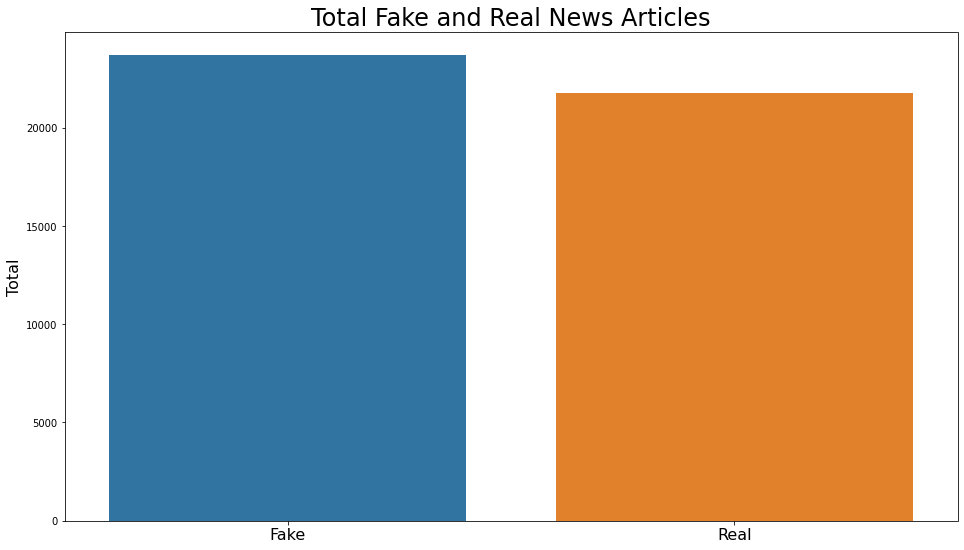

In [ ]:

plt.figure(figsize=(16,9))

sns.countplot(df.category)
plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Fake', 'Real'], fontsize=16)

plt.show()

In [ ]:

df.isna().sum()

Title       0
text        0
Subject     0
category    0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45452 entries, 0 to 23696
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     45452 non-null  object
 1   text      45452 non-null  object
 2   Subject   45452 non-null  object
 3   category  45452 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
# From all of the above exploration we can see we have a fairly balanced dataset. There are also no null values
# We have a total of 45,452 observations to work with moving forward.

In [ ]:
df.Subject.value_counts()

politicsNews       11363
worldnews          10145
News                9306
politics            6838
left-news           4457
Government News     1570
US_News              775
Middle-east          770
PoliticalFact        228
Name: Subject, dtype: int64

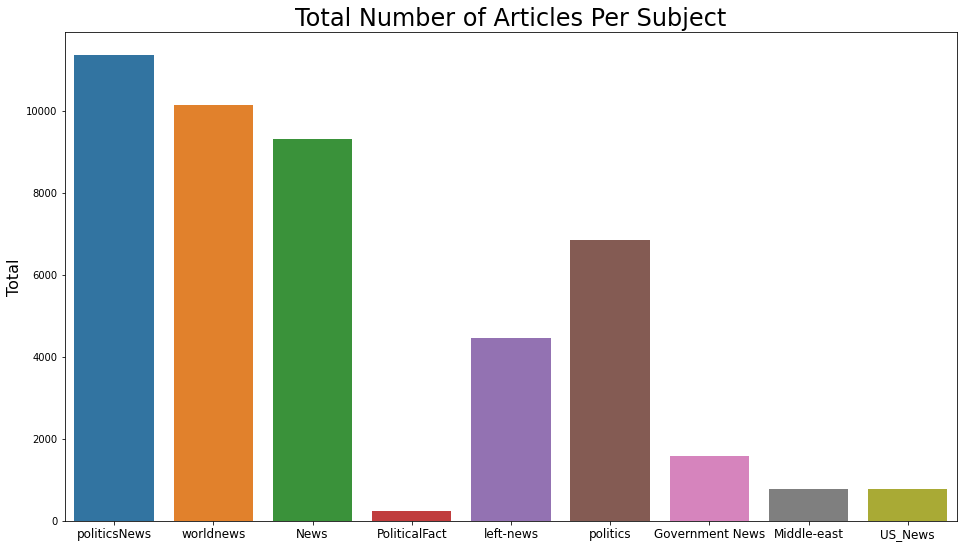

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x='Subject', data=df)

plt.title('Total Number of Articles Per Subject', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)

plt.show()

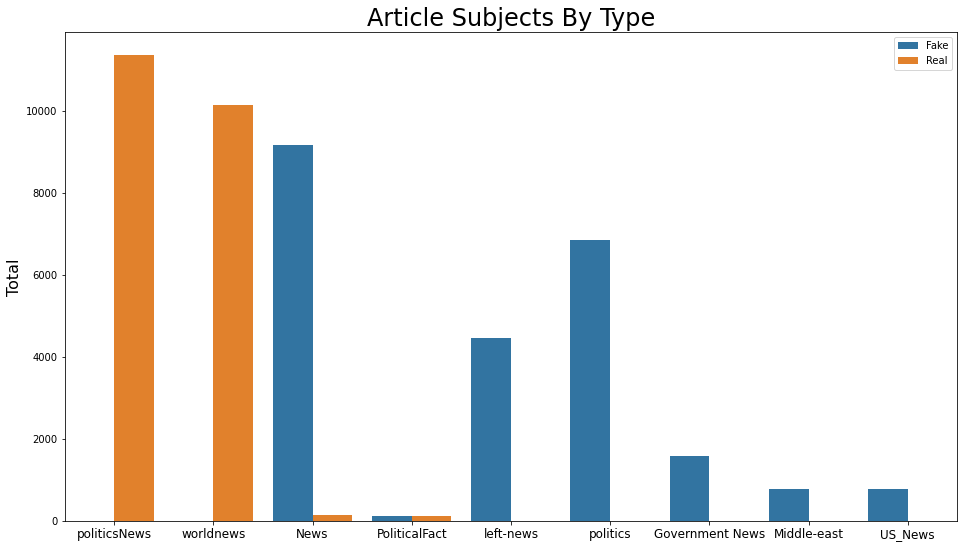

In [ ]:
plt.figure(figsize=(16,9))
sns.countplot(x='Subject', hue='category', data=df)

plt.title('Article Subjects By Type', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=12)
plt.legend(['Fake', 'Real'])

plt.show()

In [ ]:
# Well, now that is interesting. It's clear that if we include the 'Subject' column in our further exploration
# and analysis it will have a significant impact on our results. So, we'll need to drop that column.

In [ ]:
df.head()

,Title,text,Subject,category
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,1


In [ ]:
# Now we'll create the Corpus that will be used in our NLP model

# This will create a single column with all the relevant text

df['text'] = df['Title'] + " " + df['text']

# This will delete all the other columns we do not need for the rest of the work.
del df['Title'] # added to our text corpus
del df['Subject'] # we determined it would affect our results


In [ ]:

# Now we need to clean up the corpus. We'll do this by removing stop words, URLs, brackets, etc.

In [ ]:
 import nltk
 nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [ ]:

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [ ]:
# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

In [ ]:
# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
# Final function to clean the text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls
    text = remove_stopwords(text)
    return text

In [ ]:
df.head()

,text,category
0,Trump judicial nominee withdraws from consider...,1
1,No. 2 Democrat in Senate calls on Franken to r...,1
2,"WTO chief won't debate Trump, but rallies supp...",1
3,Hungary says it is facing 'frontal assault' fr...,1
4,Senate Republicans shove tax bill ahead as Dem...,1


In [ ]:
# Now we'll make a few crowd favorites: Word Clouds. We'll make two version. The first will be a typical set,
# then we'll dress them up a bit.

<function matplotlib.pyplot.show>

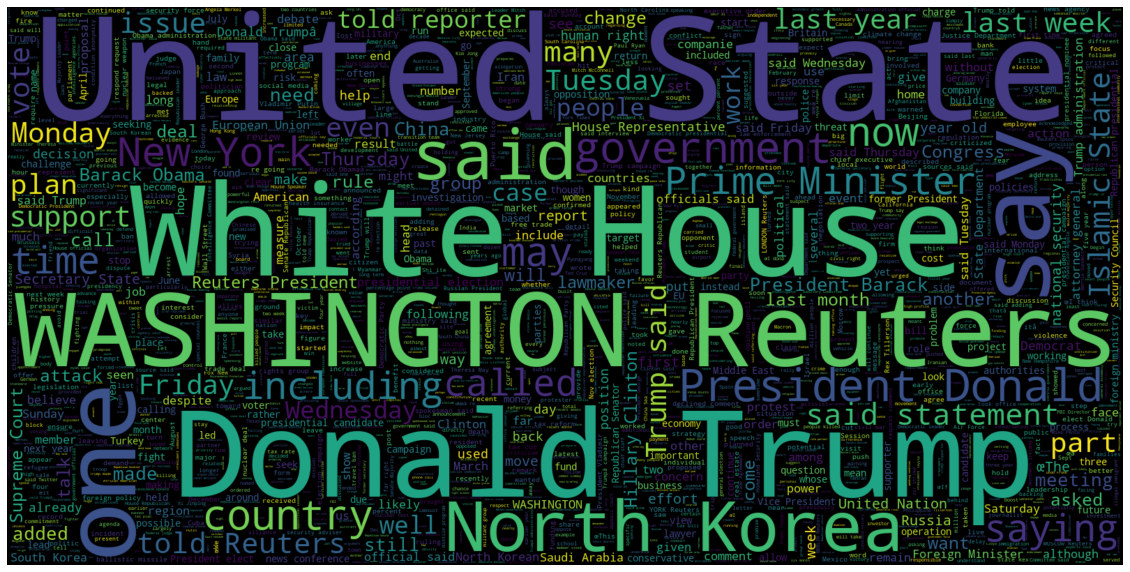

In [ ]:

plt.figure(figsize = (20,20)) # Text from the real news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

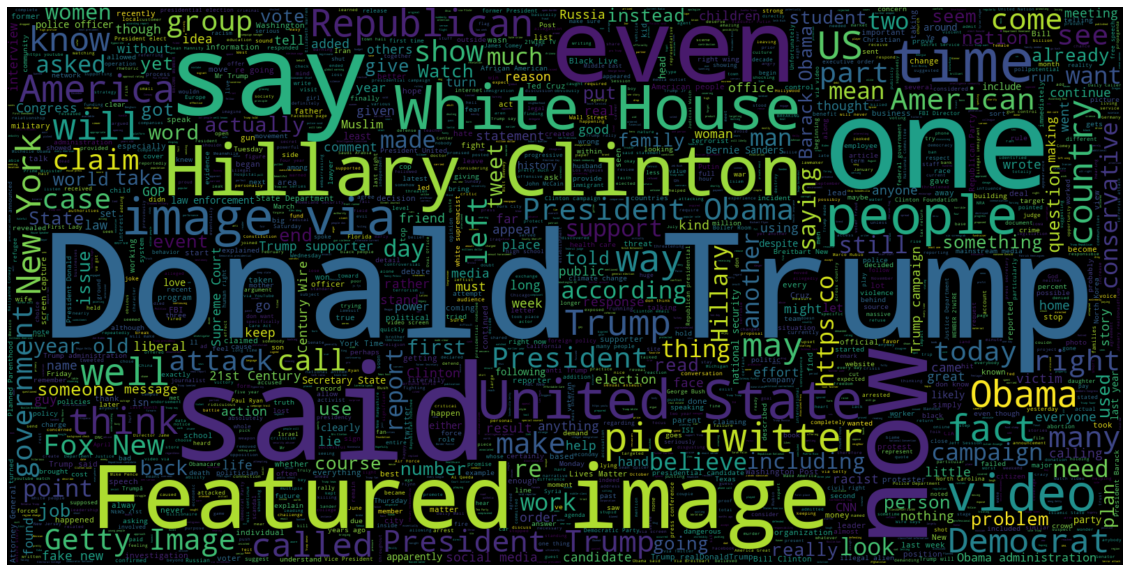

In [ ]:
plt.figure(figsize = (20,20)) # Text from the fake news articles
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

plt.axis("off")
plt.show

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
plt.figure(figsize = (20,20))
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

corpus = clean(' '.join(df[df.category == 0].text))

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

corpus_str = listToString(corpus)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()



wc = WordCloud(background_color="white", max_words=2000, mask=coloring,
               stopwords=stopwords, max_font_size=80, random_state=42)

# generate word cloud
wc.generate(corpus_str)

# create coloring from image
image_colors = ImageColorGenerator(coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

NameError: ignored

<Figure size 1440x1440 with 0 Axes>

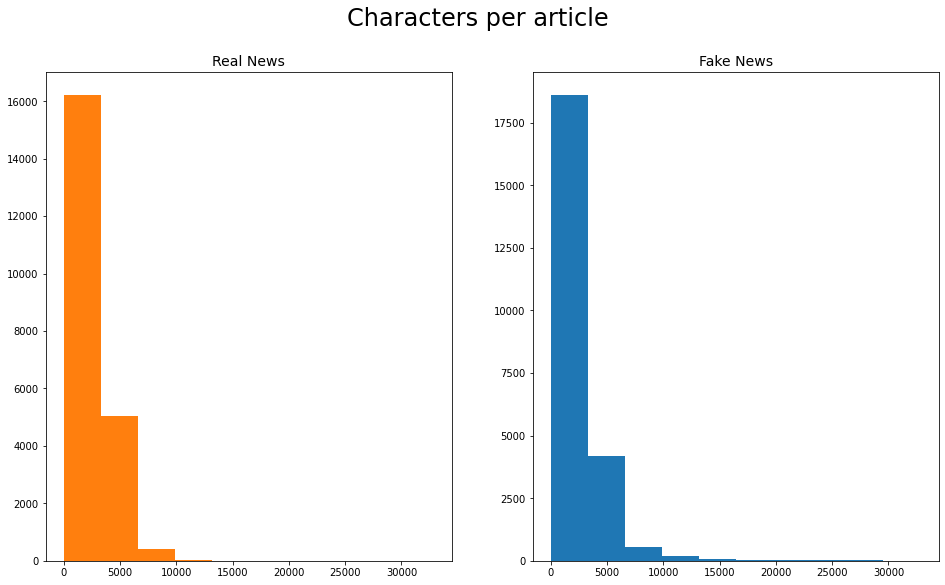

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len=df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color='tab:orange')
ax1.set_title('Real News', fontsize=14)
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color='tab:blue')
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Characters per article', fontsize=24)

plt.show()

In [ ]:

# There seem to be differences in the characters per article between the two categories. It looks like 
# 2500 or less characters in text is the most common in real news category, while around 5000 or less
# characters in text are most common in fake news category.

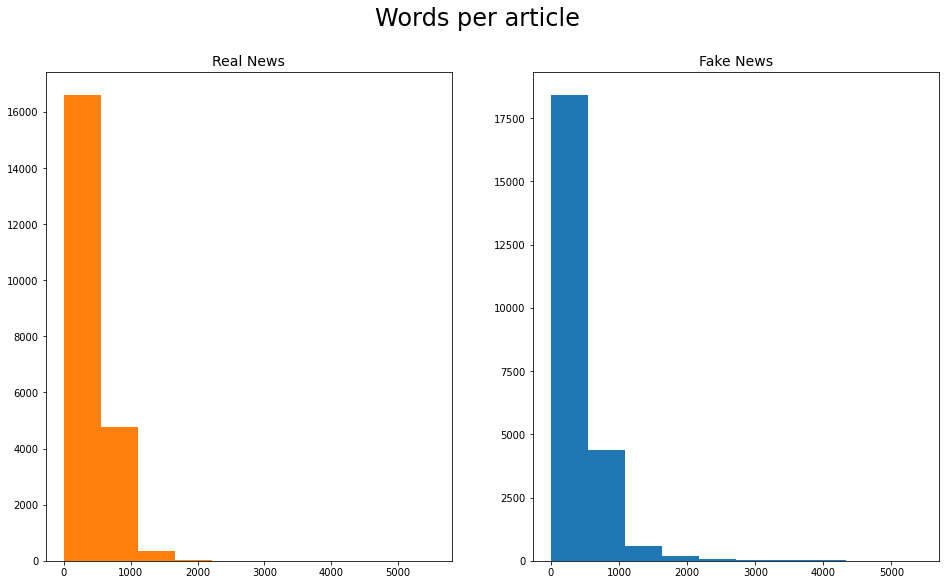

In [ ]:

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='tab:orange')
ax1.set_title('Real News', fontsize=14)
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='tab:blue')
ax2.set_title('Fake News', fontsize=14)
fig.suptitle('Words per article', fontsize=24)

# plt.title('Article Subjects By Type')
# plt.ylabel('Total', fontsize=16)
# plt.xlabel('')
# plt.xlim(fontsize=12)
# plt.legend(['Fake', 'Real'])
plt.show()

In [ ]:
# Now that we've done a bit of data exploration, let's get into modeling
# First up, we need to Train Test Split the data

X = df.text
y = df.category

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)

In [ ]:
X = df.text
y = df.category

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8,stratify=y, random_state=19)

# Create of Count Vectorize object
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

# Transform the train dataset
cv_train=cv.fit_transform(X_train)

# Transform the test dataset
cv_test=cv.transform(X_test)

print('Bag of words Train:',cv_train.shape)
print('Bag of words Test:',cv_test.shape)

Bag of words Train: (36361, 6874004)
Bag of words Test: (9091, 6874004)


In [ ]:
# Create the TF-IDF object
tfidf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))

# Transform the train dataset
tfidf_train=tfidf.fit_transform(X_train)

# Transform the test dataset
tfidf_test=tfidf.transform(X_test)

print('TF-IDF Train:',tfidf_train.shape)
print('TF-IDF Test:',tfidf_test.shape)

TF-IDF Train: (36361, 6874004)
TF-IDF Test: (9091, 6874004)


In [ ]:
# Create our model object
mnb = MultinomialNB()

# Fit the model to the Bag of words CountVectorizor
mnb_cv = mnb.fit(cv_train, y_train)

# Fit the model to the TF-IDF features
mnb_tfidf = mnb.fit(tfidf_train, y_train)

In [ ]:
# Predicting the model for bag of words
mnb_cv_predict=mnb.predict(cv_test)

# Predicting the model for tf-idf features
mnb_tfidf_predict=mnb.predict(tfidf_test)

In [ ]:

# Check the accuracy score for bag of words
mnb_cv_score=accuracy_score(y_test, mnb_cv_predict)
print("Naive Bayes Bag of words accuracy score:", mnb_cv_score)

# Check the accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("Naive Bayes TF-IDF accuracy score:", mnb_tfidf_score)

Naive Bayes Bag of words accuracy score: 0.949510504894951
Naive Bayes TF-IDF accuracy score: 0.92630073699263


In [ ]:
mnb_cv_report = classification_report(y_test, mnb_cv_predict, target_names = ['0','1'])
print(mnb_cv_report)
mnb_tfidf_report = classification_report(y_test, mnb_tfidf_predict, target_names = ['0','1'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4740
           1       0.95      0.94      0.95      4351

    accuracy                           0.95      9091
   macro avg       0.95      0.95      0.95      9091
weighted avg       0.95      0.95      0.95      9091

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      4740
           1       0.98      0.86      0.92      4351

    accuracy                           0.93      9091
   macro avg       0.93      0.92      0.93      9091
weighted avg       0.93      0.93      0.93      9091



In [ ]:
# At the end of some quick EDA and NLP modeling, we're left with a high level understanding of the two datasets,
# some charts and word clouds for a data product, and a model that currently has 94% accuracy with Bag of Words
# and 92% with TF-IDF.